In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:\\titanic\\train.csv")
test_df=pd.read_csv("C:\\titanic\\test.csv")

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#this shows how many rows and columns are there.
print(df.shape)#for train dataset
print(test_df.shape)#for test dataset


(891, 12)
(418, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
m_val=df.isnull().sum().sort_values(ascending=False)
m_val.head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

# Visualization of the missed values

<AxesSubplot:>

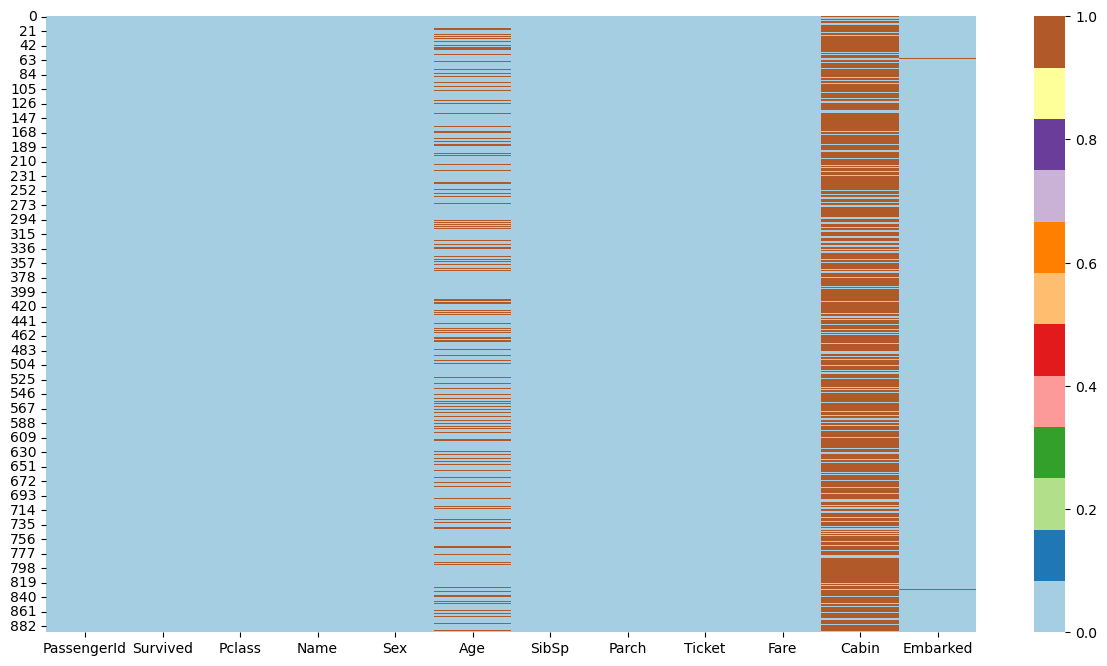

In [8]:
#Visualizing of the missed values
plt.figure(figsize=(15,8))
sns.heatmap(df.isna(), cmap='Paired')

The brown strips are the missing values

In [9]:
m_per=df.isnull().sum()/df.isnull().count()*100
null_df=pd.DataFrame({'Missing Values': m_val,'Percentage':
                     m_per.sort_values(ascending=False)})
null_df.head()

,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


# Visualization of the Age group

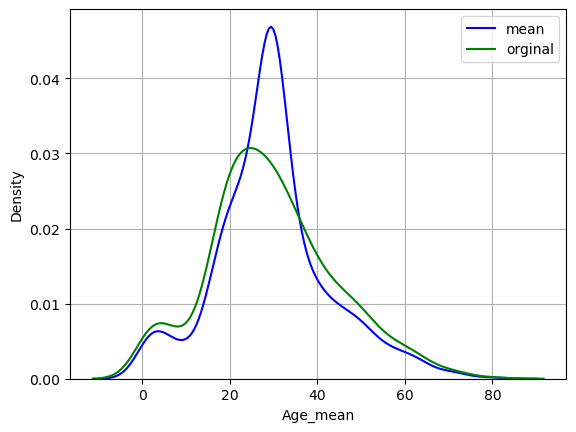

In [10]:
#This is a graph representation of the age group
#The blue line plot means when we fill all the null values with mean age value
#The green line plot represents the orignal age with the null values

df["Age_mean"]= df["Age"].fillna(df["Age"].mean())

sns.kdeplot(df["Age_mean"],color='blue',label='mean')
sns.kdeplot(df["Age"],color='green',label='orginal')
plt.legend()
plt.grid()

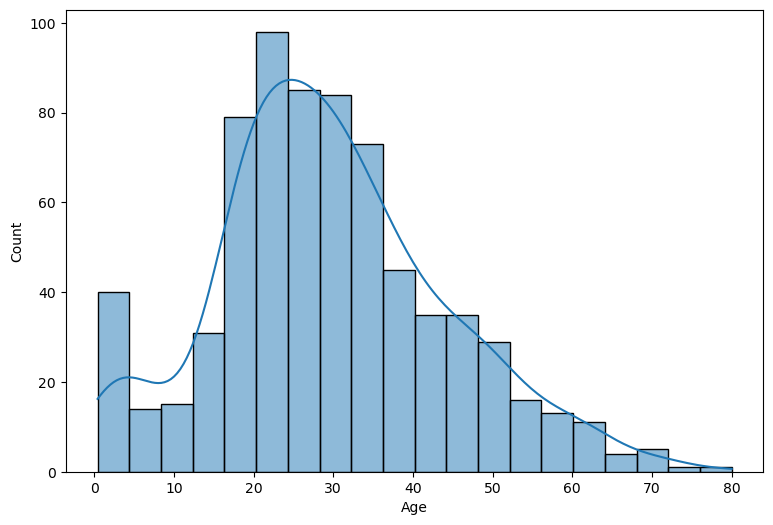

In [11]:
#The orignal age plot with null values
plt.figure(figsize=(9,6))
sns.histplot(df,x='Age',kde=True)

# Filling all the missing values with mean

In [12]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].mean())

print(df["Age"].isnull().sum())
print(test_df["Age"].isnull().sum())

0
0


# Dropping of Columns

In [13]:
df.drop(['Cabin','Name','Ticket','Fare','PassengerId','Age_mean'],axis=1,inplace=True)
test_df.drop(['Cabin','Name','Ticket','Fare'],axis=1,inplace=True)

In [14]:
df.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
5,0,3,male,29.699118,0,0,Q


# Percentage of Survived and Not Survived

In [15]:
pd.DataFrame({' ':['Not survived','Survived'],'Value counts' : df['Survived']
             .value_counts(),'Percentage(%)' :[(df["Survived"]==0)
                                              .sum()*100/len(df),(df["Survived"]==1)
                                               .sum()*100/len(df)]}).head()

,,Value counts,Percentage(%)
0,Not survived,549,61.616162
1,Survived,342,38.383838


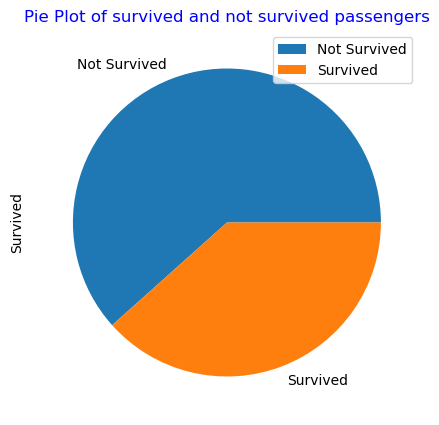

In [16]:
df["Survived"].value_counts().plot(kind='pie',figsize=(7,5),labels=["Not Survived","Survived"])

plt.title("Pie Plot of survived and not survived passengers",c="b")
plt.legend()

According to the data
61.6% passengers did not survived
while 38.38% did survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

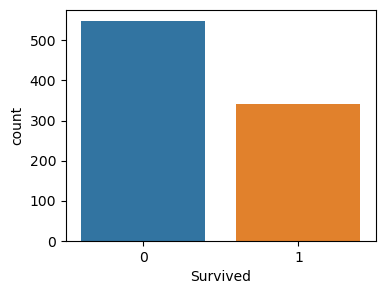

In [17]:
plt.figure(figsize=(4,3))
sns.countplot(x='Survived',data=df)

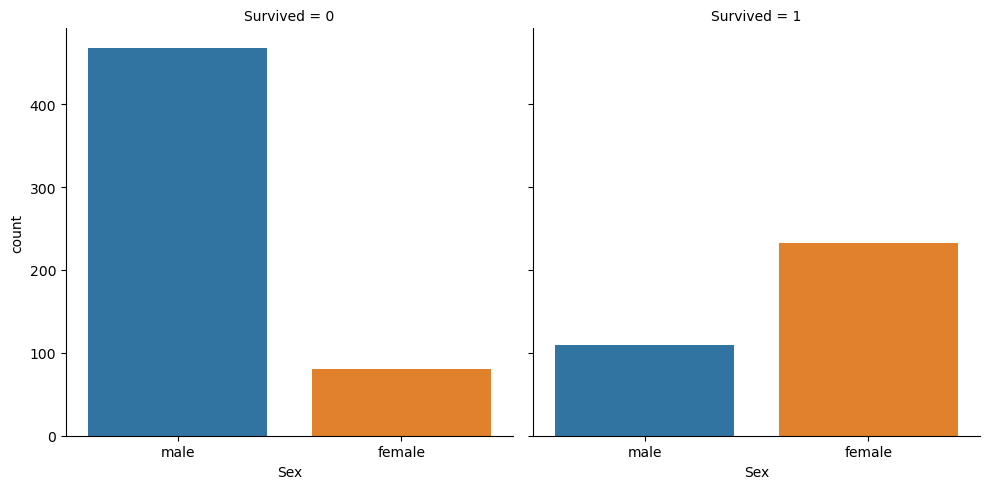

In [18]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df)

The female passengers survived more than male passengers.

# Data prep for the model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [20]:
lb=LabelEncoder()
df["Sex"]=lb.fit_transform(df["Sex"].values)
df["Embarked"]=lb.fit_transform(df["Embarked"].values)

test_df["Sex"]=lb.fit_transform(test_df["Sex"].values)
test_df["Embarked"]=lb.fit_transform(test_df["Embarked"].values)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [22]:
x = df.iloc[:,1:7]
y=df.loc[:,'Survived']
x_test=test_df.drop("PassengerId", axis=1)

In [23]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_test = scaler.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

## 1.Logistic Regression Model

In [25]:
lr=LogisticRegression()
lr.fit(x,y)
lr_score=round(lr.score(x,y)*100,2)
print("Accuracy for Logistic Regression model is:",lr_score)

Accuracy for Logistic Regression model is: 80.36


## 2.Random Forest Model

In [26]:
rf=RandomForestClassifier()
rf.fit(x,y)
rf_score=round(rf.score(x,y)*100,2)
print("Accuracy for Random Forest model is:",rf_score)

Accuracy for Random Forest model is: 93.71


## 3.SVC Model

In [27]:
svc=SVC()
svc.fit(x,y)
svc_score=round(svc.score(x,y)*100,2)
print("Accuracy for SVC model is:",svc_score)

Accuracy for SVC model is: 84.4


## 4.Linear Regression Model

In [28]:
linr=LinearRegression()
linr.fit(x,y)
linr_score=round(linr.score(x,y)*100,2)
print("Accuracy for Linear Regression model is:",linr_score)

Accuracy for Linear Regression model is: 39.73


## 5.Decision Tree Model

In [29]:
dt=DecisionTreeClassifier()
dt.fit(x,y)
dt_score=round(dt.score(x,y)*100,2)
print("Accuracy for Decision Tree model is:",dt_score)

Accuracy for Decision Tree model is: 93.71


# Prediction

In [30]:
final=rf.predict(x_test)

In [31]:
out_df=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':final})
out_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0
